In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import *
from sklearn.metrics import *
from sklearn.preprocessing import *
import warnings
warnings.filterwarnings("ignore")
from datetime import *
import joblib

In [4]:
df = pd.read_csv("Turbine_Data.csv")

In [5]:
df.head()

Unnamed: 0  ActivePower  AmbientTemperatue  \
0  2017-12-31 00:00:00+00:00          NaN                NaN   
1  2017-12-31 00:10:00+00:00          NaN                NaN   
2  2017-12-31 00:20:00+00:00          NaN                NaN   
3  2017-12-31 00:30:00+00:00          NaN                NaN   
4  2017-12-31 00:40:00+00:00          NaN                NaN   

   BearingShaftTemperature  Blade1PitchAngle  Blade2PitchAngle  \
0                      NaN               NaN               NaN   
1                      NaN               NaN               NaN   
2                      NaN               NaN               NaN   
3                      NaN               NaN               NaN   
4                      NaN               NaN               NaN   

   Blade3PitchAngle  ControlBoxTemperature  GearboxBearingTemperature  \
0               NaN                    NaN                        NaN   
1               NaN                    NaN                        NaN   
2               NaN                    NaN                        NaN   
3               NaN                    NaN                        NaN   
4               NaN                    NaN                        NaN   

   GearboxOilTemperature  ...  GeneratorWinding2Temperature  HubTemperature  \
0                    NaN  ...                           NaN             NaN   
1                    NaN  ...                           NaN             NaN   
2                    NaN  ...                           NaN             NaN   
3                    NaN  ...                           NaN             NaN   
4                    NaN  ...                           NaN             NaN   

   MainBoxTemperature  NacellePosition  ReactivePower  RotorRPM  \
0                 NaN              NaN            NaN       NaN   
1                 NaN              NaN            NaN       NaN   
2                 NaN              NaN            NaN       NaN   
3                 NaN              NaN            NaN       NaN   
4                 NaN              NaN            NaN       NaN   

   TurbineStatus  WTG  WindDirection WindSpeed  
0            NaN  G01            NaN       NaN  
1            NaN  G01            NaN       NaN  
2            NaN  G01            NaN       NaN  
3            NaN  G01            NaN       NaN  
4            NaN  G01            NaN       NaN  

[5 rows x 22 columns]

In [6]:
df_1 = df.set_index("Unnamed: 0")
df_1.head()

ActivePower  AmbientTemperatue  \
Unnamed: 0                                                  
2017-12-31 00:00:00+00:00          NaN                NaN   
2017-12-31 00:10:00+00:00          NaN                NaN   
2017-12-31 00:20:00+00:00          NaN                NaN   
2017-12-31 00:30:00+00:00          NaN                NaN   
2017-12-31 00:40:00+00:00          NaN                NaN   

                           BearingShaftTemperature  Blade1PitchAngle  \
Unnamed: 0                                                             
2017-12-31 00:00:00+00:00                      NaN               NaN   
2017-12-31 00:10:00+00:00                      NaN               NaN   
2017-12-31 00:20:00+00:00                      NaN               NaN   
2017-12-31 00:30:00+00:00                      NaN               NaN   
2017-12-31 00:40:00+00:00                      NaN               NaN   

                           Blade2PitchAngle  Blade3PitchAngle  \
Unnamed: 0                                                      
2017-12-31 00:00:00+00:00               NaN               NaN   
2017-12-31 00:10:00+00:00               NaN               NaN   
2017-12-31 00:20:00+00:00               NaN               NaN   
2017-12-31 00:30:00+00:00               NaN               NaN   
2017-12-31 00:40:00+00:00               NaN               NaN   

                           ControlBoxTemperature  GearboxBearingTemperature  \
Unnamed: 0                                                                    
2017-12-31 00:00:00+00:00                    NaN                        NaN   
2017-12-31 00:10:00+00:00                    NaN                        NaN   
2017-12-31 00:20:00+00:00                    NaN                        NaN   
2017-12-31 00:30:00+00:00                    NaN                        NaN   
2017-12-31 00:40:00+00:00                    NaN                        NaN   

                           GearboxOilTemperature  GeneratorRPM  ...  \
Unnamed: 0                                                      ...   
2017-12-31 00:00:00+00:00                    NaN           NaN  ...   
2017-12-31 00:10:00+00:00                    NaN           NaN  ...   
2017-12-31 00:20:00+00:00                    NaN           NaN  ...   
2017-12-31 00:30:00+00:00                    NaN           NaN  ...   
2017-12-31 00:40:00+00:00                    NaN           NaN  ...   

                           GeneratorWinding2Temperature  HubTemperature  \
Unnamed: 0                                                                
2017-12-31 00:00:00+00:00                           NaN             NaN   
2017-12-31 00:10:00+00:00                           NaN             NaN   
2017-12-31 00:20:00+00:00                           NaN             NaN   
2017-12-31 00:30:00+00:00                           NaN             NaN   
2017-12-31 00:40:00+00:00                           NaN             NaN   

                           MainBoxTemperature  NacellePosition  ReactivePower  \
Unnamed: 0                                                                      
2017-12-31 00:00:00+00:00                 NaN              NaN            NaN   
2017-12-31 00:10:00+00:00                 NaN              NaN            NaN   
2017-12-31 00:20:00+00:00                 NaN              NaN            NaN   
2017-12-31 00:30:00+00:00                 NaN              NaN            NaN   
2017-12-31 00:40:00+00:00                 NaN              NaN            NaN   

                           RotorRPM  TurbineStatus  WTG WindDirection  \
Unnamed: 0                                                              
2017-12-31 00:00:00+00:00       NaN            NaN  G01           NaN   
2017-12-31 00:10:00+00:00       NaN            NaN  G01           NaN   
2017-12-31 00:20:00+00:00       NaN            NaN  G01           NaN   
2017-12-31 00:30:00+00:00       NaN            NaN  G01           NaN   
2017-12-31 00:40:00+00:00       NaN            NaN  G0

In [7]:
df_1.duplicated().sum()

23039

In [8]:
df_2 = df_1.drop_duplicates()
df_2.head()

ActivePower  AmbientTemperatue  \
Unnamed: 0                                                  
2017-12-31 00:00:00+00:00          NaN                NaN   
2018-01-01 00:00:00+00:00    -5.357727          23.148729   
2018-01-01 00:10:00+00:00    -5.822360          23.039754   
2018-01-01 00:20:00+00:00    -5.279409          22.948703   
2018-01-01 00:30:00+00:00    -4.648054          22.966851   

                           BearingShaftTemperature  Blade1PitchAngle  \
Unnamed: 0                                                             
2017-12-31 00:00:00+00:00                      NaN               NaN   
2018-01-01 00:00:00+00:00                      NaN               NaN   
2018-01-01 00:10:00+00:00                      NaN               NaN   
2018-01-01 00:20:00+00:00                      NaN               NaN   
2018-01-01 00:30:00+00:00                      NaN               NaN   

                           Blade2PitchAngle  Blade3PitchAngle  \
Unnamed: 0                                                      
2017-12-31 00:00:00+00:00               NaN               NaN   
2018-01-01 00:00:00+00:00               NaN               NaN   
2018-01-01 00:10:00+00:00               NaN               NaN   
2018-01-01 00:20:00+00:00               NaN               NaN   
2018-01-01 00:30:00+00:00               NaN               NaN   

                           ControlBoxTemperature  GearboxBearingTemperature  \
Unnamed: 0                                                                    
2017-12-31 00:00:00+00:00                    NaN                        NaN   
2018-01-01 00:00:00+00:00                    NaN                        NaN   
2018-01-01 00:10:00+00:00                    NaN                        NaN   
2018-01-01 00:20:00+00:00                    NaN                        NaN   
2018-01-01 00:30:00+00:00                    NaN                        NaN   

                           GearboxOilTemperature  GeneratorRPM  ...  \
Unnamed: 0                                                      ...   
2017-12-31 00:00:00+00:00                    NaN           NaN  ...   
2018-01-01 00:00:00+00:00                    NaN           NaN  ...   
2018-01-01 00:10:00+00:00                    NaN           NaN  ...   
2018-01-01 00:20:00+00:00                    NaN           NaN  ...   
2018-01-01 00:30:00+00:00                    NaN           NaN  ...   

                           GeneratorWinding2Temperature  HubTemperature  \
Unnamed: 0                                                                
2017-12-31 00:00:00+00:00                           NaN             NaN   
2018-01-01 00:00:00+00:00                           NaN             NaN   
2018-01-01 00:10:00+00:00                           NaN             NaN   
2018-01-01 00:20:00+00:00                           NaN             NaN   
2018-01-01 00:30:00+00:00                           NaN             NaN   

                           MainBoxTemperature  NacellePosition  ReactivePower  \
Unnamed: 0                                                                      
2017-12-31 00:00:00+00:00                 NaN              NaN            NaN   
2018-01-01 00:00:00+00:00                 NaN         8.000000      -9.960830   
2018-01-01 00:10:00+00:00                 NaN       300.428571      -9.628441   
2018-01-01 00:20:00+00:00                 NaN       340.000000      -9.491235   
2018-01-01 00:30:00+00:00                 NaN       345.000000      -9.856136   

                           RotorRPM  TurbineStatus  WTG WindDirection  \
Unnamed: 0                                                              
2017-12-31 00:00:00+00:00       NaN            NaN  G01           NaN   
2018-01-01 00:00:00+00:00       NaN            NaN  G01      8.000000   
2018-01-01 00:10:00+00:00       NaN            NaN  G01    300.428571   
2018-01-01 00:20:00+00:00       NaN            NaN  G01    340.000000   
2018-01-01 00:30:00+00:00       NaN            NaN  G0

In [9]:
pp = df_2.nunique()
pp.head()

ActivePower                94084
AmbientTemperatue          93678
BearingShaftTemperature    62286
Blade1PitchAngle           38946
Blade2PitchAngle           39021
dtype: int64

In [10]:
one_unique_value_cols = pp[pp==1].index.values
df_3 = df_2.drop(columns=one_unique_value_cols)
df_3.head()

ActivePower  AmbientTemperatue  \
Unnamed: 0                                                  
2017-12-31 00:00:00+00:00          NaN                NaN   
2018-01-01 00:00:00+00:00    -5.357727          23.148729   
2018-01-01 00:10:00+00:00    -5.822360          23.039754   
2018-01-01 00:20:00+00:00    -5.279409          22.948703   
2018-01-01 00:30:00+00:00    -4.648054          22.966851   

                           BearingShaftTemperature  Blade1PitchAngle  \
Unnamed: 0                                                             
2017-12-31 00:00:00+00:00                      NaN               NaN   
2018-01-01 00:00:00+00:00                      NaN               NaN   
2018-01-01 00:10:00+00:00                      NaN               NaN   
2018-01-01 00:20:00+00:00                      NaN               NaN   
2018-01-01 00:30:00+00:00                      NaN               NaN   

                           Blade2PitchAngle  Blade3PitchAngle  \
Unnamed: 0                                                      
2017-12-31 00:00:00+00:00               NaN               NaN   
2018-01-01 00:00:00+00:00               NaN               NaN   
2018-01-01 00:10:00+00:00               NaN               NaN   
2018-01-01 00:20:00+00:00               NaN               NaN   
2018-01-01 00:30:00+00:00               NaN               NaN   

                           GearboxBearingTemperature  GearboxOilTemperature  \
Unnamed: 0                                                                    
2017-12-31 00:00:00+00:00                        NaN                    NaN   
2018-01-01 00:00:00+00:00                        NaN                    NaN   
2018-01-01 00:10:00+00:00                        NaN                    NaN   
2018-01-01 00:20:00+00:00                        NaN                    NaN   
2018-01-01 00:30:00+00:00                        NaN                    NaN   

                           GeneratorRPM  GeneratorWinding1Temperature  \
Unnamed: 0                                                              
2017-12-31 00:00:00+00:00           NaN                           NaN   
2018-01-01 00:00:00+00:00           NaN                           NaN   
2018-01-01 00:10:00+00:00           NaN                           NaN   
2018-01-01 00:20:00+00:00           NaN                           NaN   
2018-01-01 00:30:00+00:00           NaN                           NaN   

                           GeneratorWinding2Temperature  HubTemperature  \
Unnamed: 0                                                                
2017-12-31 00:00:00+00:00                           NaN             NaN   
2018-01-01 00:00:00+00:00                           NaN             NaN   
2018-01-01 00:10:00+00:00                           NaN             NaN   
2018-01-01 00:20:00+00:00                           NaN             NaN   
2018-01-01 00:30:00+00:00                           NaN             NaN   

                           MainBoxTemperature  NacellePosition  ReactivePower  \
Unnamed: 0                                                                      
2017-12-31 00:00:00+00:00                 NaN              NaN            NaN   
2018-01-01 00:00:00+00:00                 NaN         8.000000      -9.960830   
2018-01-01 00:10:00+00:00                 NaN       300.428571      -9.628441   
2018-01-01 00:20:00+00:00                 NaN       340.000000      -9.491235   
2018-01-01 00:30:00+00:00                 NaN       345.000000      -9.856136   

                           RotorRPM  TurbineStatus  WindDirection  WindSpeed  
Unnamed: 0                                                                    
2017-12-31 00:00:00+00:00       NaN            NaN            NaN        NaN  
2018-01-01 00:00:00+00:00       NaN            NaN       8.000000   2.279088  
2018-01-01 00:10:00+00:00       NaN            NaN     300.428571   2.339343  
2018-01-01 00:20:00+00:00       NaN            NaN     340.000000   2.455610  
2018

In [11]:
df_3.describe()

ActivePower  AmbientTemperatue  BearingShaftTemperature  \
count  94624.000000       93698.000000             62380.000000   
mean     619.036994          28.777569                43.105338   
std      610.917748           4.358470                 5.168850   
min      -38.524659           0.000000                 0.000000   
25%       80.098952          25.625603                39.856871   
50%      402.880706          28.338961                42.927465   
75%     1073.979105          31.665910                47.018075   
max     1779.032433          42.405597                55.088655   

       Blade1PitchAngle  Blade2PitchAngle  Blade3PitchAngle  \
count      41987.000000      41882.000000      41882.000000   
mean           9.751759         10.038709         10.038709   
std           20.646533         20.272100         20.272100   
min          -43.156734        -26.443415        -26.443415   
25%           -0.939896         -0.433316         -0.433316   
50%            0.395038          0.889782          0.889782   
75%            8.101939          8.481306          8.481306   
max           90.143610         90.017830         90.017830   

       GearboxBearingTemperature  GearboxOilTemperature  GeneratorRPM  \
count               62402.000000           62430.000000  62287.000000   
mean                   64.376222              57.561706   1102.146658   
std                    10.020754               6.324124    527.967896   
min                     0.000000               0.000000      0.000000   
25%                    57.925129              53.944023   1029.812895   
50%                    64.862406              57.197064   1124.930500   
75%                    71.104401              61.307270   1515.517020   
max                    82.237932              70.764581   1809.941700   

       GeneratorWinding1Temperature  GeneratorWinding2Temperature  \
count                  62419.000000                  62441.000000   
mean                      72.462897                     71.829134   
std                       22.626685                     22.649494   
min                        0.000000                      0.000000   
25%                       55.492241                     54.763998   
50%                       65.792061                     65.006679   
75%                       85.874609                     85.342714   
max                      126.773031                    126.043018   

       HubTemperature  MainBoxTemperature  NacellePosition  ReactivePower  \
count    62268.000000        62369.000000     72108.000000   94622.000000   
mean        36.979752           39.635107       196.307894      88.070309   
std          4.884101            5.428555        88.279316     116.498176   
min          0.000000            0.000000         0.000000    -203.182591   
25%         33.977709           35.843574       145.000000      -0.433723   
50%         37.003815           39.500759       182.000000      35.938526   
75%         40.009538           43.370342       271.000000     147.190453   
max         47.996185           54.250000       357.000000     403.713620   

           RotorRPM  TurbineStatus  WindDirection     WindSpeed  
count  62119.000000   6.275900e+04   72108.000000  94469.000000  
mean       9.908585   2.284016e+03     196.307894      5.879193  
std        4.717546   3.590288e+05      88.279316      2.617241  
min        0.000000   0.000000e+00       0.000000      0.000000  
25%        9.231097   2.000000e+00     145.000000      3.824572  
50%       10.099272   2.000000e+00     182.000000      5.558520  
75%       13.600908   2.000000e+00     271.000000      7.505555  
max       16.273495   6.574653e+07     357.000000     22.970893

In [12]:
df_4 = df_3[df_3["ActivePower"]>=0]
df_4.head()

ActivePower  AmbientTemperatue  \
Unnamed: 0                                                  
2018-01-01 06:20:00+00:00    26.212347          28.696304   
2018-01-01 06:40:00+00:00    59.632658          29.052567   
2018-01-01 06:50:00+00:00    40.889650          28.984758   
2018-01-01 10:40:00+00:00    34.398111          30.282058   
2018-01-01 12:00:00+00:00    29.797653          29.333519   

                           BearingShaftTemperature  Blade1PitchAngle  \
Unnamed: 0                                                             
2018-01-01 06:20:00+00:00                      NaN               NaN   
2018-01-01 06:40:00+00:00                      NaN               NaN   
2018-01-01 06:50:00+00:00                      NaN               NaN   
2018-01-01 10:40:00+00:00                      NaN               NaN   
2018-01-01 12:00:00+00:00                      NaN               NaN   

                           Blade2PitchAngle  Blade3PitchAngle  \
Unnamed: 0                                                      
2018-01-01 06:20:00+00:00               NaN               NaN   
2018-01-01 06:40:00+00:00               NaN               NaN   
2018-01-01 06:50:00+00:00               NaN               NaN   
2018-01-01 10:40:00+00:00               NaN               NaN   
2018-01-01 12:00:00+00:00               NaN               NaN   

                           GearboxBearingTemperature  GearboxOilTemperature  \
Unnamed: 0                                                                    
2018-01-01 06:20:00+00:00                        NaN                    NaN   
2018-01-01 06:40:00+00:00                        NaN                    NaN   
2018-01-01 06:50:00+00:00                        NaN                    NaN   
2018-01-01 10:40:00+00:00                        NaN                    NaN   
2018-01-01 12:00:00+00:00                        NaN                    NaN   

                           GeneratorRPM  GeneratorWinding1Temperature  \
Unnamed: 0                                                              
2018-01-01 06:20:00+00:00           NaN                           NaN   
2018-01-01 06:40:00+00:00           NaN                           NaN   
2018-01-01 06:50:00+00:00           NaN                           NaN   
2018-01-01 10:40:00+00:00           NaN                           NaN   
2018-01-01 12:00:00+00:00           NaN                           NaN   

                           GeneratorWinding2Temperature  HubTemperature  \
Unnamed: 0                                                                
2018-01-01 06:20:00+00:00                           NaN             NaN   
2018-01-01 06:40:00+00:00                           NaN             NaN   
2018-01-01 06:50:00+00:00                           NaN             NaN   
2018-01-01 10:40:00+00:00                           NaN             NaN   
2018-01-01 12:00:00+00:00                           NaN             NaN   

                           MainBoxTemperature  NacellePosition  ReactivePower  \
Unnamed: 0                                                                      
2018-01-01 06:20:00+00:00                 NaN           252.00       3.976499   
2018-01-01 06:40:00+00:00                 NaN           255.00      11.091660   
2018-01-01 06:50:00+00:00                 NaN           264.75       4.234497   
2018-01-01 10:40:00+00:00                 NaN           283.75       5.347792   
2018-01-01 12:00:00+00:00                 NaN           274.00       6.022326   

                           RotorRPM  TurbineStatus  WindDirection  WindSpeed  
Unnamed: 0                                                                    
2018-01-01 06:20:00+00:00       NaN            NaN         252.00   3.042750  
2018-01-01 06:40:00+00:00       NaN            NaN         255.00   3.424814  
2018-01-01 06:50:00+00:00       NaN            NaN         264.75   3.507172  
2018-01-01 10:40:00+00:00       NaN            NaN         283.75   3.442212  
2018

In [13]:
(df_4.isna().sum() * 100 / df_4.isna().sum().sum()).round(2).head()

ActivePower                0.00
AmbientTemperatue          0.23
BearingShaftTemperature    6.09
Blade1PitchAngle           9.83
Blade2PitchAngle           9.85
dtype: float64

In [14]:
df_4.head()

ActivePower  AmbientTemperatue  \
Unnamed: 0                                                  
2018-01-01 06:20:00+00:00    26.212347          28.696304   
2018-01-01 06:40:00+00:00    59.632658          29.052567   
2018-01-01 06:50:00+00:00    40.889650          28.984758   
2018-01-01 10:40:00+00:00    34.398111          30.282058   
2018-01-01 12:00:00+00:00    29.797653          29.333519   

                           BearingShaftTemperature  Blade1PitchAngle  \
Unnamed: 0                                                             
2018-01-01 06:20:00+00:00                      NaN               NaN   
2018-01-01 06:40:00+00:00                      NaN               NaN   
2018-01-01 06:50:00+00:00                      NaN               NaN   
2018-01-01 10:40:00+00:00                      NaN               NaN   
2018-01-01 12:00:00+00:00                      NaN               NaN   

                           Blade2PitchAngle  Blade3PitchAngle  \
Unnamed: 0                                                      
2018-01-01 06:20:00+00:00               NaN               NaN   
2018-01-01 06:40:00+00:00               NaN               NaN   
2018-01-01 06:50:00+00:00               NaN               NaN   
2018-01-01 10:40:00+00:00               NaN               NaN   
2018-01-01 12:00:00+00:00               NaN               NaN   

                           GearboxBearingTemperature  GearboxOilTemperature  \
Unnamed: 0                                                                    
2018-01-01 06:20:00+00:00                        NaN                    NaN   
2018-01-01 06:40:00+00:00                        NaN                    NaN   
2018-01-01 06:50:00+00:00                        NaN                    NaN   
2018-01-01 10:40:00+00:00                        NaN                    NaN   
2018-01-01 12:00:00+00:00                        NaN                    NaN   

                           GeneratorRPM  GeneratorWinding1Temperature  \
Unnamed: 0                                                              
2018-01-01 06:20:00+00:00           NaN                           NaN   
2018-01-01 06:40:00+00:00           NaN                           NaN   
2018-01-01 06:50:00+00:00           NaN                           NaN   
2018-01-01 10:40:00+00:00           NaN                           NaN   
2018-01-01 12:00:00+00:00           NaN                           NaN   

                           GeneratorWinding2Temperature  HubTemperature  \
Unnamed: 0                                                                
2018-01-01 06:20:00+00:00                           NaN             NaN   
2018-01-01 06:40:00+00:00                           NaN             NaN   
2018-01-01 06:50:00+00:00                           NaN             NaN   
2018-01-01 10:40:00+00:00                           NaN             NaN   
2018-01-01 12:00:00+00:00                           NaN             NaN   

                           MainBoxTemperature  NacellePosition  ReactivePower  \
Unnamed: 0                                                                      
2018-01-01 06:20:00+00:00                 NaN           252.00       3.976499   
2018-01-01 06:40:00+00:00                 NaN           255.00      11.091660   
2018-01-01 06:50:00+00:00                 NaN           264.75       4.234497   
2018-01-01 10:40:00+00:00                 NaN           283.75       5.347792   
2018-01-01 12:00:00+00:00                 NaN           274.00       6.022326   

                           RotorRPM  TurbineStatus  WindDirection  WindSpeed  
Unnamed: 0                                                                    
2018-01-01 06:20:00+00:00       NaN            NaN         252.00   3.042750  
2018-01-01 06:40:00+00:00       NaN            NaN         255.00   3.424814  
2018-01-01 06:50:00+00:00       NaN            NaN         264.75   3.507172  
2018-01-01 10:40:00+00:00       NaN            NaN         283.75   3.442212  
2018

In [15]:
df_5 = df_4.reset_index()
df_5.head()

Unnamed: 0  ActivePower  AmbientTemperatue  \
0  2018-01-01 06:20:00+00:00    26.212347          28.696304   
1  2018-01-01 06:40:00+00:00    59.632658          29.052567   
2  2018-01-01 06:50:00+00:00    40.889650          28.984758   
3  2018-01-01 10:40:00+00:00    34.398111          30.282058   
4  2018-01-01 12:00:00+00:00    29.797653          29.333519   

   BearingShaftTemperature  Blade1PitchAngle  Blade2PitchAngle  \
0                      NaN               NaN               NaN   
1                      NaN               NaN               NaN   
2                      NaN               NaN               NaN   
3                      NaN               NaN               NaN   
4                      NaN               NaN               NaN   

   Blade3PitchAngle  GearboxBearingTemperature  GearboxOilTemperature  \
0               NaN                        NaN                    NaN   
1               NaN                        NaN                    NaN   
2               NaN                        NaN                    NaN   
3               NaN                        NaN                    NaN   
4               NaN                        NaN                    NaN   

   GeneratorRPM  GeneratorWinding1Temperature  GeneratorWinding2Temperature  \
0           NaN                           NaN                           NaN   
1           NaN                           NaN                           NaN   
2           NaN                           NaN                           NaN   
3           NaN                           NaN                           NaN   
4           NaN                           NaN                           NaN   

   HubTemperature  MainBoxTemperature  NacellePosition  ReactivePower  \
0             NaN                 NaN           252.00       3.976499   
1             NaN                 NaN           255.00      11.091660   
2             NaN                 NaN           264.75       4.234497   
3             NaN                 NaN           283.75       5.347792   
4             NaN                 NaN           274.00       6.022326   

   RotorRPM  TurbineStatus  WindDirection  WindSpeed  
0       NaN            NaN         252.00   3.042750  
1       NaN            NaN         255.00   3.424814  
2       NaN            NaN         264.75   3.507172  
3       NaN            NaN         283.75   3.442212  
4       NaN            NaN         274.00   3.031363

In [16]:
df_6 = df_5.copy()
df_6["Unnamed: 0"] = pd.to_datetime(df_6["Unnamed: 0"])
df_6["date"] = df_6["Unnamed: 0"].dt.date
df_7 = df_6.drop(columns=["Unnamed: 0"])
df_8 = df_7.groupby(by="date").mean()
df_8.head()

ActivePower  AmbientTemperatue  BearingShaftTemperature  \
date                                                                  
2018-01-01   366.223561          25.528849                      NaN   
2018-01-02   462.550740          25.357526                      NaN   
2018-01-03   454.417752          24.379363                      NaN   
2018-01-04   369.952190          24.912347                      NaN   
2018-01-05   319.446595          23.535679                      NaN   

            Blade1PitchAngle  Blade2PitchAngle  Blade3PitchAngle  \
date                                                               
2018-01-01               NaN               NaN               NaN   
2018-01-02               NaN               NaN               NaN   
2018-01-03               NaN               NaN               NaN   
2018-01-04               NaN               NaN               NaN   
2018-01-05               NaN               NaN               NaN   

            GearboxBearingTemperature  GearboxOilTemperature  GeneratorRPM  \
date                                                                         
2018-01-01                        NaN                    NaN           NaN   
2018-01-02                        NaN                    NaN           NaN   
2018-01-03                        NaN                    NaN           NaN   
2018-01-04                        NaN                    NaN           NaN   
2018-01-05                        NaN                    NaN           NaN   

            GeneratorWinding1Temperature  GeneratorWinding2Temperature  \
date                                                                     
2018-01-01                           NaN                           NaN   
2018-01-02                           NaN                           NaN   
2018-01-03                           NaN                           NaN   
2018-01-04                           NaN                           NaN   
2018-01-05                           NaN                           NaN   

            HubTemperature  MainBoxTemperature  NacellePosition  \
date                                                              
2018-01-01             NaN                 NaN       276.727612   
2018-01-02             NaN                 NaN       274.105603   
2018-01-03             NaN                 NaN       286.369130   
2018-01-04             NaN                 NaN       284.445471   
2018-01-05             NaN                 NaN       292.013293   

            ReactivePower  RotorRPM  TurbineStatus  WindDirection  WindSpeed  
date                                                                          
2018-01-01      74.042120       NaN            NaN     276.727612   5.263797  
2018-01-02      93.555723       NaN            NaN     274.105603   5.390719  
2018-01-03      91.627843       NaN            NaN     286.369130   5.295225  
2018-01-04      74.360621       NaN            NaN     284.445471   5.094994  
2018-01-05      64.366148       NaN            NaN     292.013293   4.915224

In [17]:
mms = MinMaxScaler()

df_9 = pd.DataFrame(mms.fit_transform(df_8),columns=df_8.columns,index=df_8.index)
df_9.head()

ActivePower  AmbientTemperatue  BearingShaftTemperature  \
date                                                                  
2018-01-01     0.212896           0.259584                      NaN   
2018-01-02     0.268893           0.249121                      NaN   
2018-01-03     0.264166           0.189383                      NaN   
2018-01-04     0.215063           0.221933                      NaN   
2018-01-05     0.185703           0.137858                      NaN   

            Blade1PitchAngle  Blade2PitchAngle  Blade3PitchAngle  \
date                                                               
2018-01-01               NaN               NaN               NaN   
2018-01-02               NaN               NaN               NaN   
2018-01-03               NaN               NaN               NaN   
2018-01-04               NaN               NaN               NaN   
2018-01-05               NaN               NaN               NaN   

            GearboxBearingTemperature  GearboxOilTemperature  GeneratorRPM  \
date                                                                         
2018-01-01                        NaN                    NaN           NaN   
2018-01-02                        NaN                    NaN           NaN   
2018-01-03                        NaN                    NaN           NaN   
2018-01-04                        NaN                    NaN           NaN   
2018-01-05                        NaN                    NaN           NaN   

            GeneratorWinding1Temperature  GeneratorWinding2Temperature  \
date                                                                     
2018-01-01                           NaN                           NaN   
2018-01-02                           NaN                           NaN   
2018-01-03                           NaN                           NaN   
2018-01-04                           NaN                           NaN   
2018-01-05                           NaN                           NaN   

            HubTemperature  MainBoxTemperature  NacellePosition  \
date                                                              
2018-01-01             NaN                 NaN         0.771125   
2018-01-02             NaN                 NaN         0.762462   
2018-01-03             NaN                 NaN         0.802980   
2018-01-04             NaN                 NaN         0.796625   
2018-01-05             NaN                 NaN         0.821629   

            ReactivePower  RotorRPM  TurbineStatus  WindDirection  WindSpeed  
date                                                                          
2018-01-01       0.218215       NaN            NaN       0.771125   0.208981  
2018-01-02       0.273671       NaN            NaN       0.762462   0.220853  
2018-01-03       0.268192       NaN            NaN       0.802980   0.211920  
2018-01-04       0.219120       NaN            NaN       0.796625   0.193190  
2018-01-05       0.190717       NaN            NaN       0.821629   0.176374

In [18]:
features_required = df_9.columns.values.tolist()[1:]
target_required = df_9.columns.values.tolist()[0]
print("Features : ")
print(features_required)
print()
print("Target   : ")
print(target_required)

Features : 
['AmbientTemperatue', 'BearingShaftTemperature', 'Blade1PitchAngle', 'Blade2PitchAngle', 'Blade3PitchAngle', 'GearboxBearingTemperature', 'GearboxOilTemperature', 'GeneratorRPM', 'GeneratorWinding1Temperature', 'GeneratorWinding2Temperature', 'HubTemperature', 'MainBoxTemperature', 'NacellePosition', 'ReactivePower', 'RotorRPM', 'TurbineStatus', 'WindDirection', 'WindSpeed']

Target   : 
ActivePower


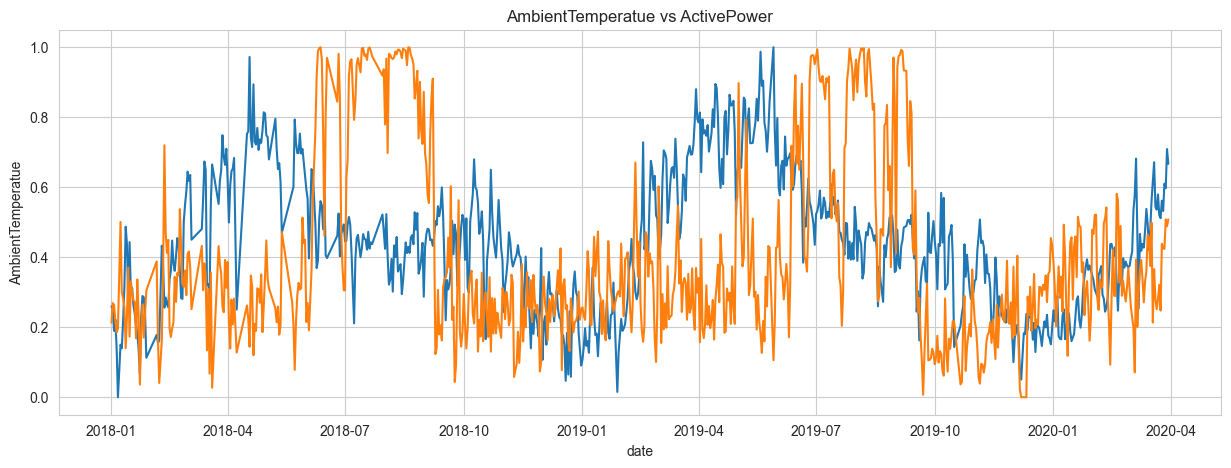

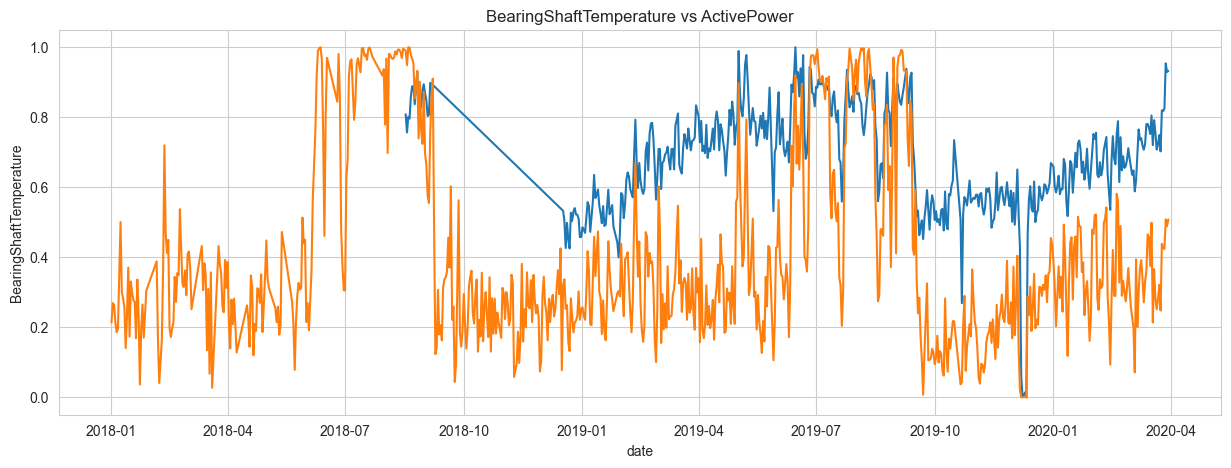

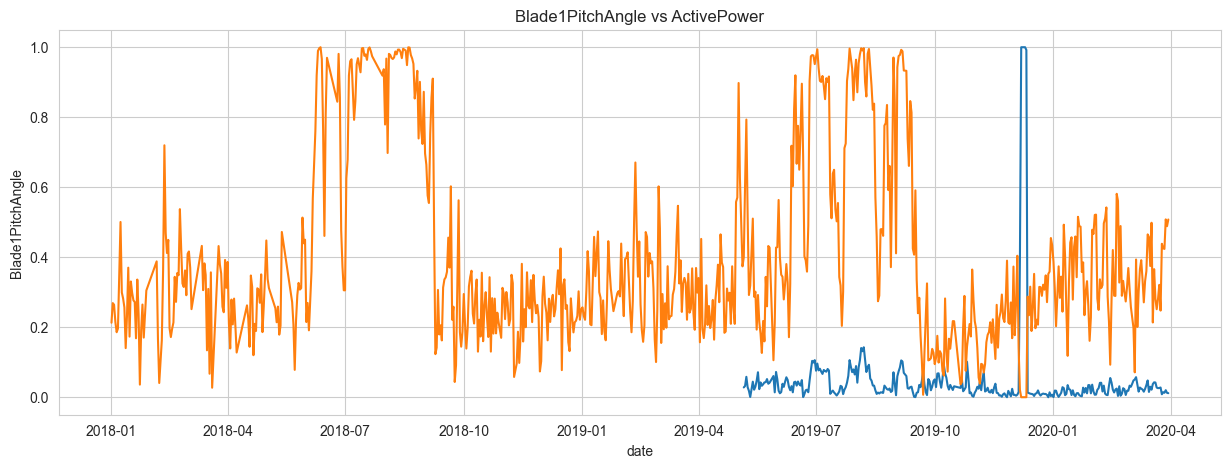

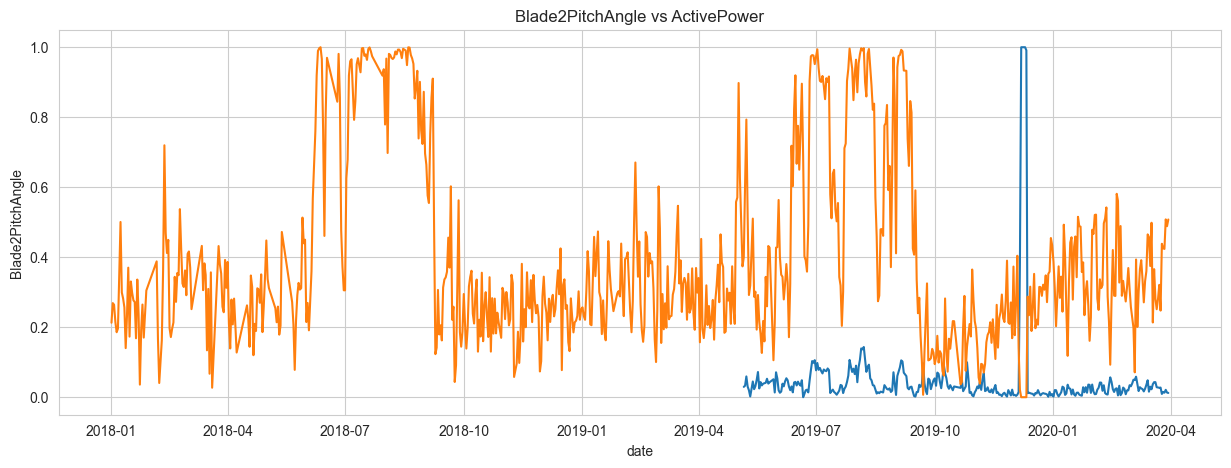

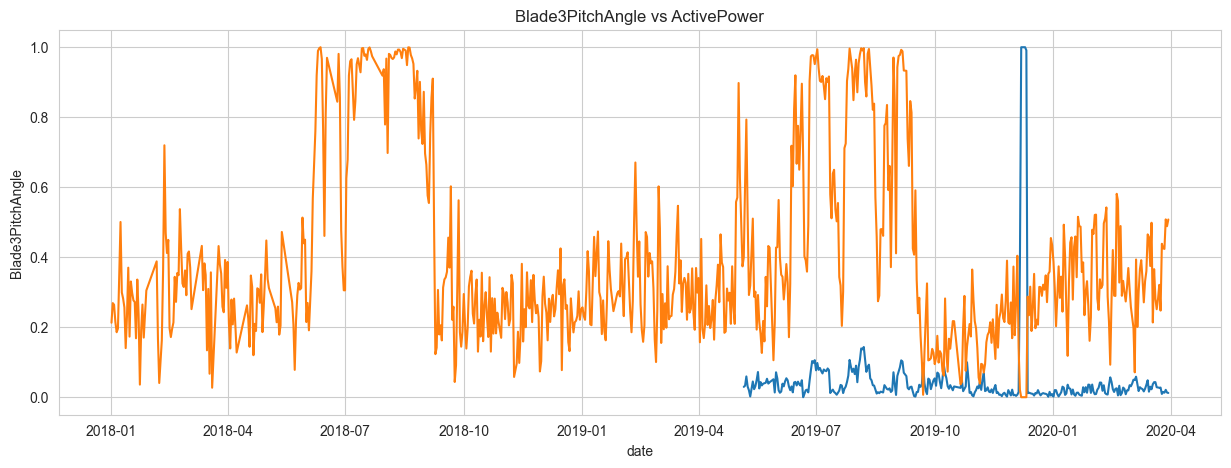

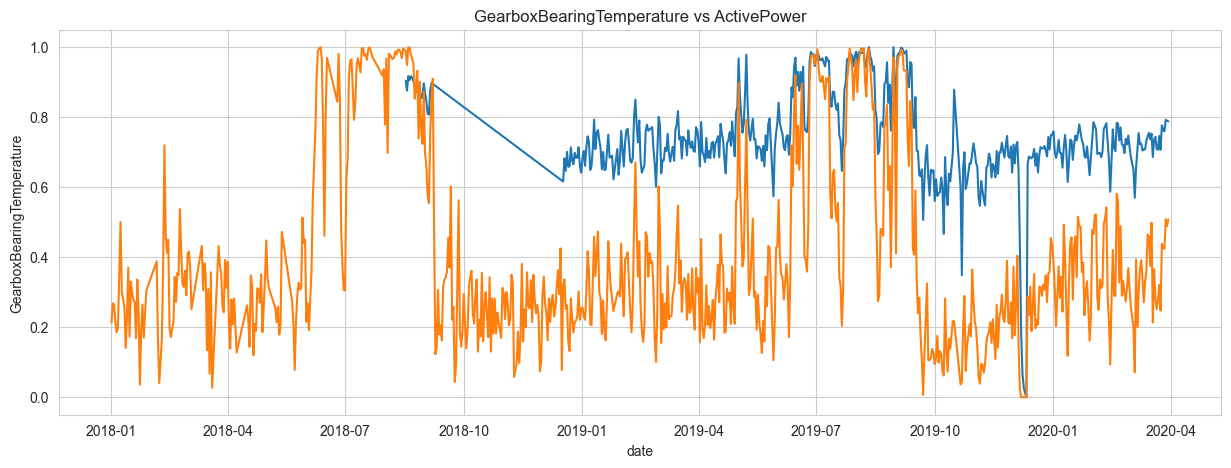

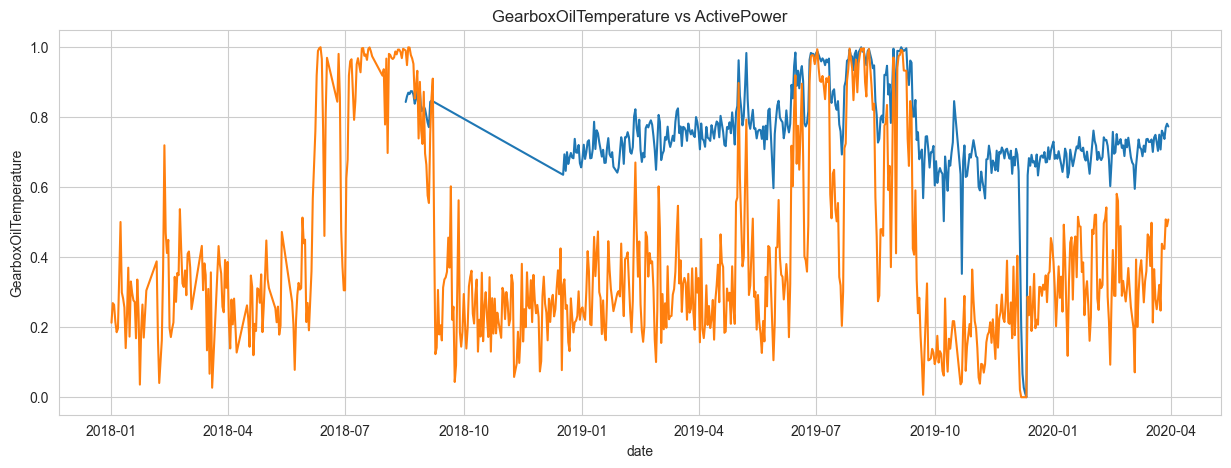

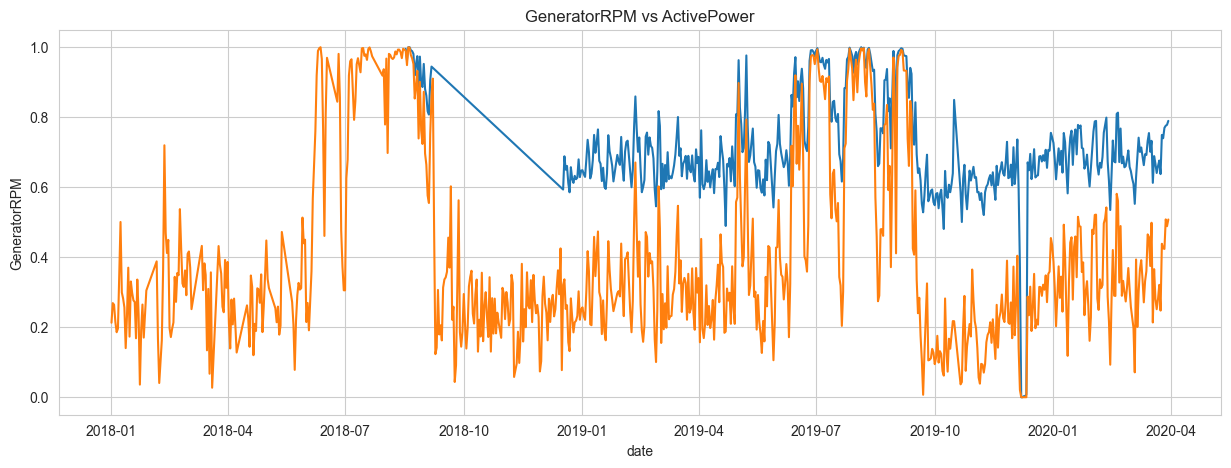

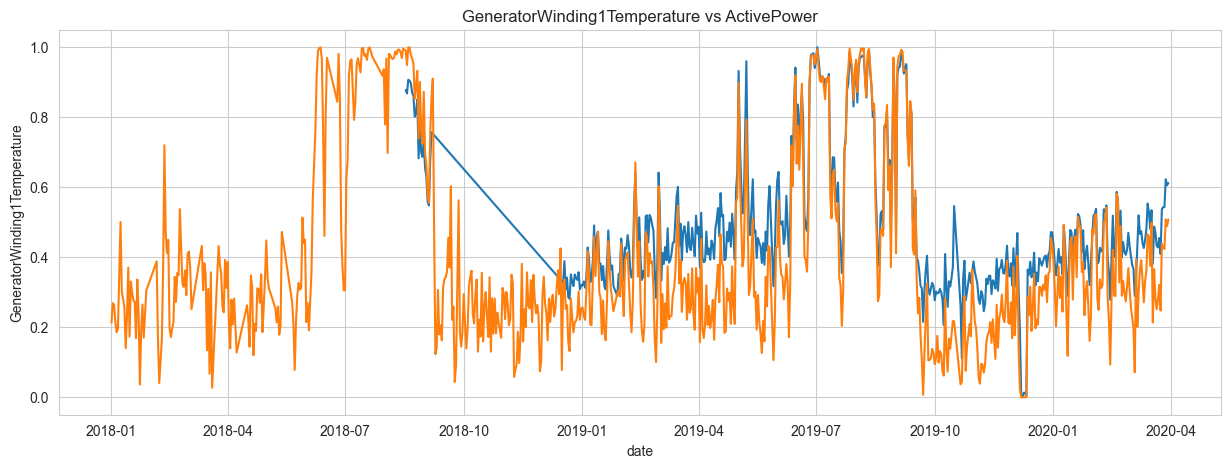

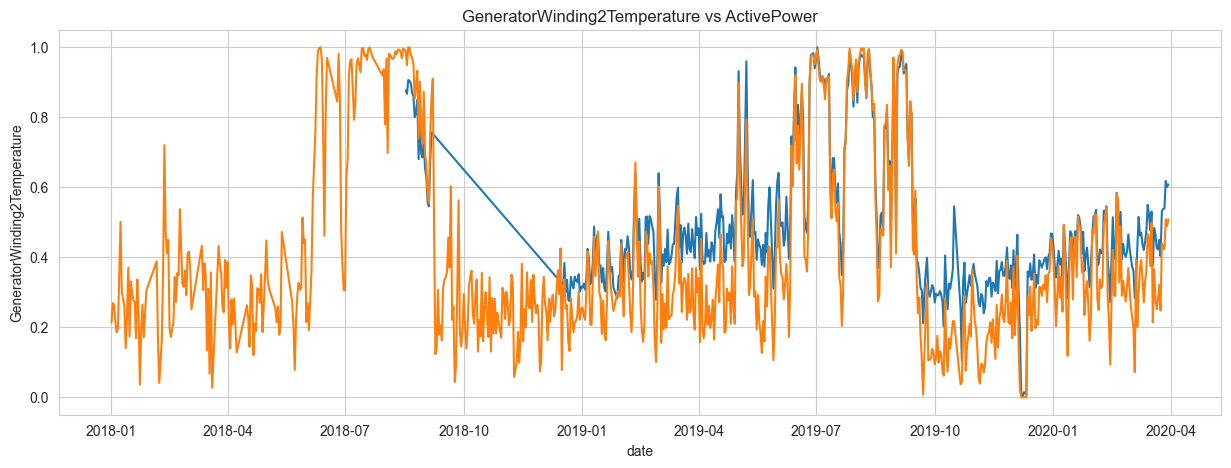

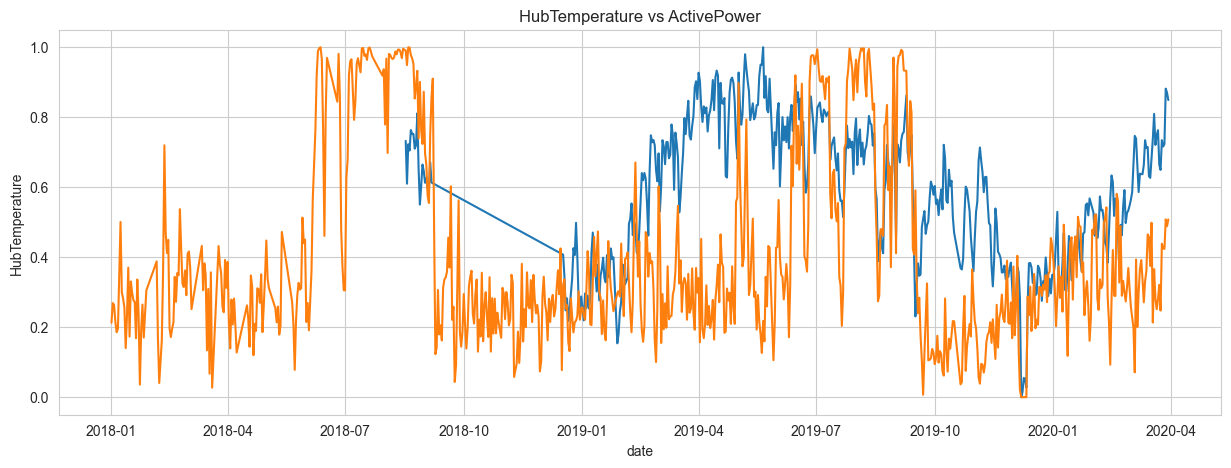

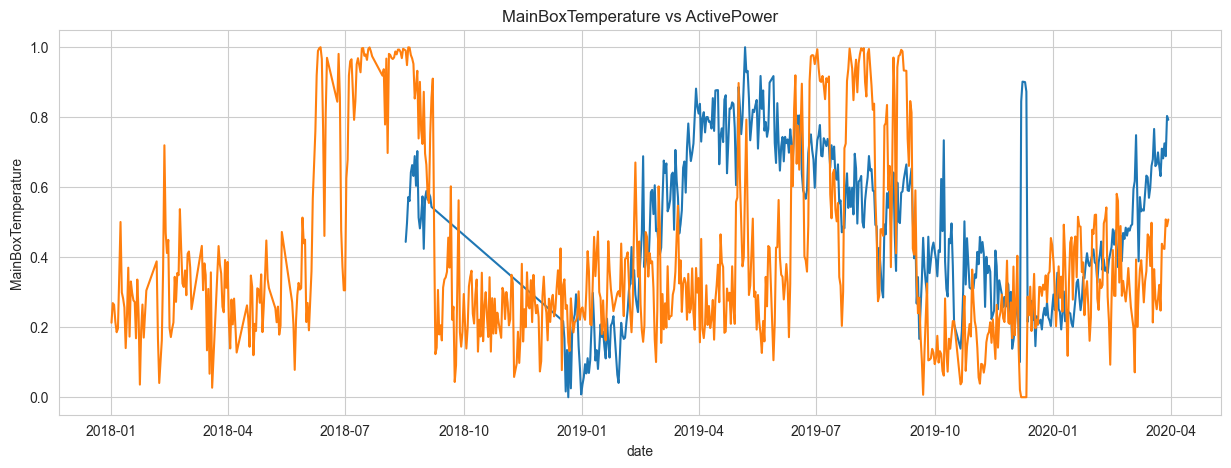

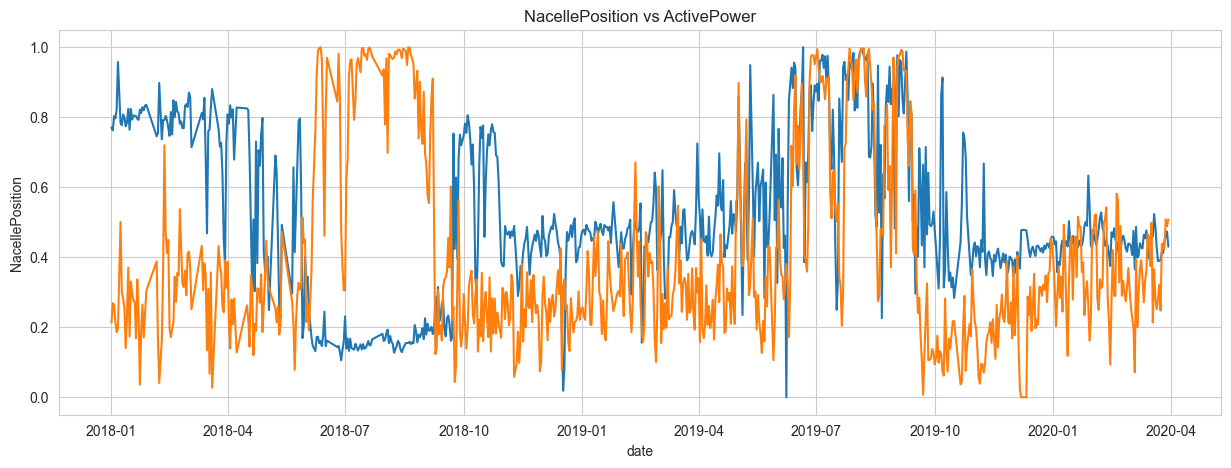

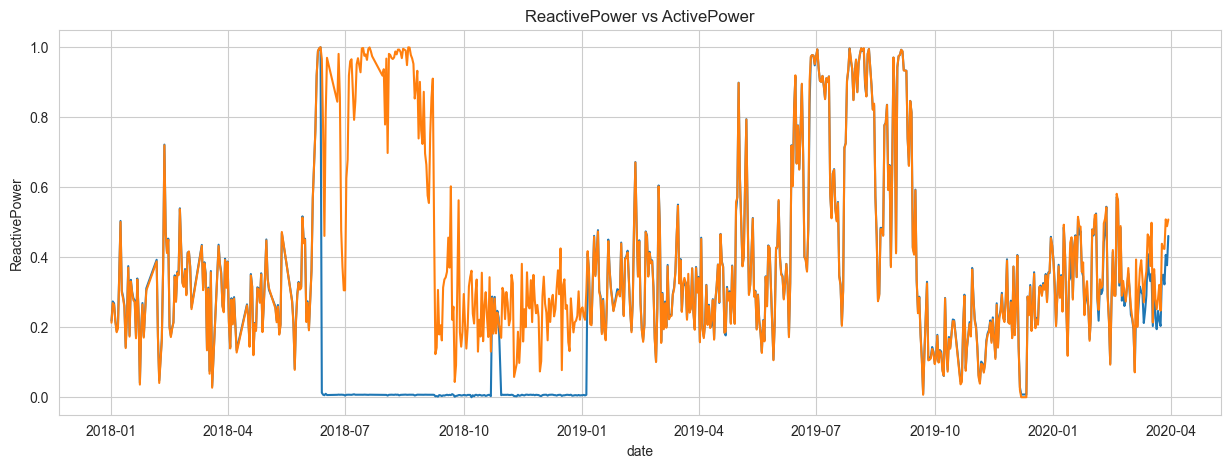

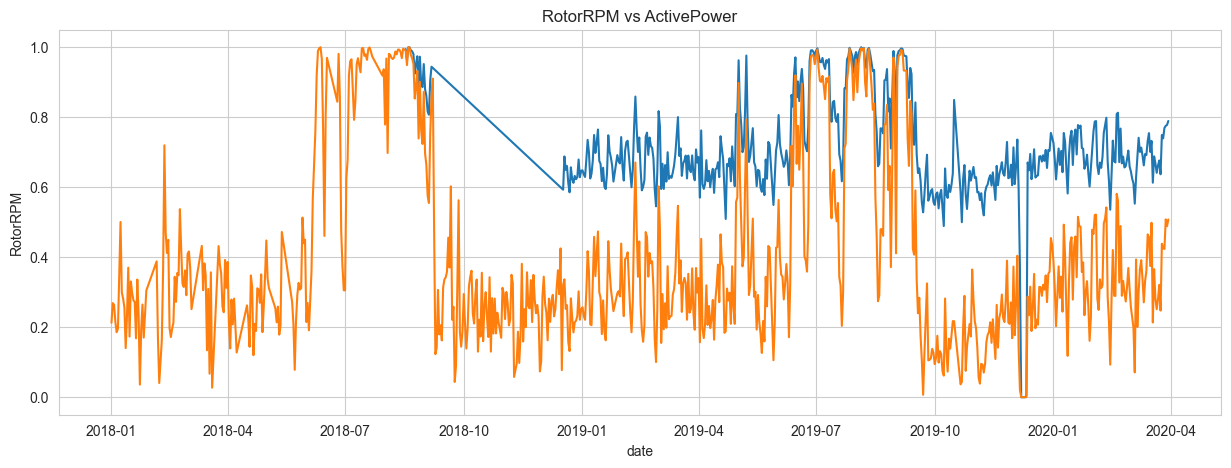

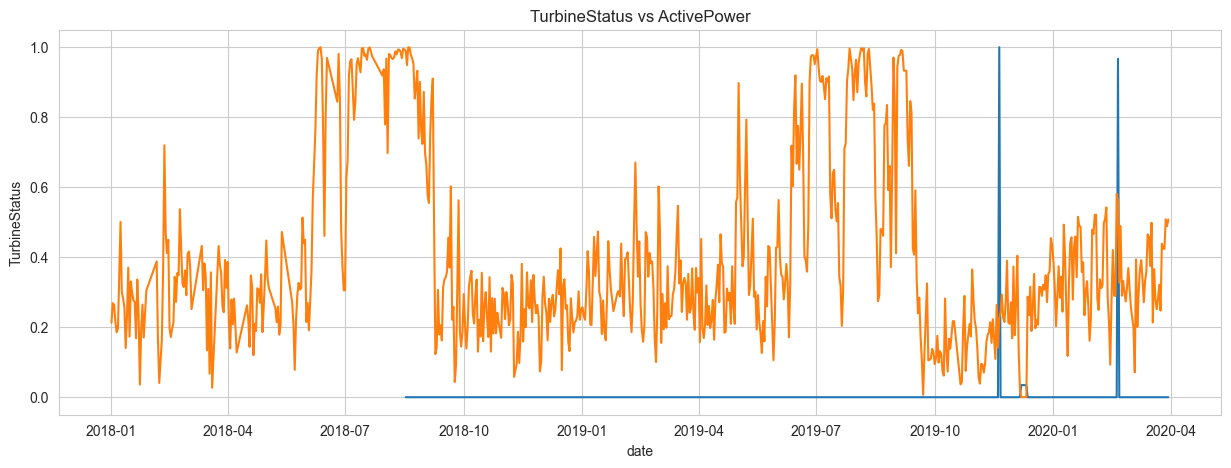

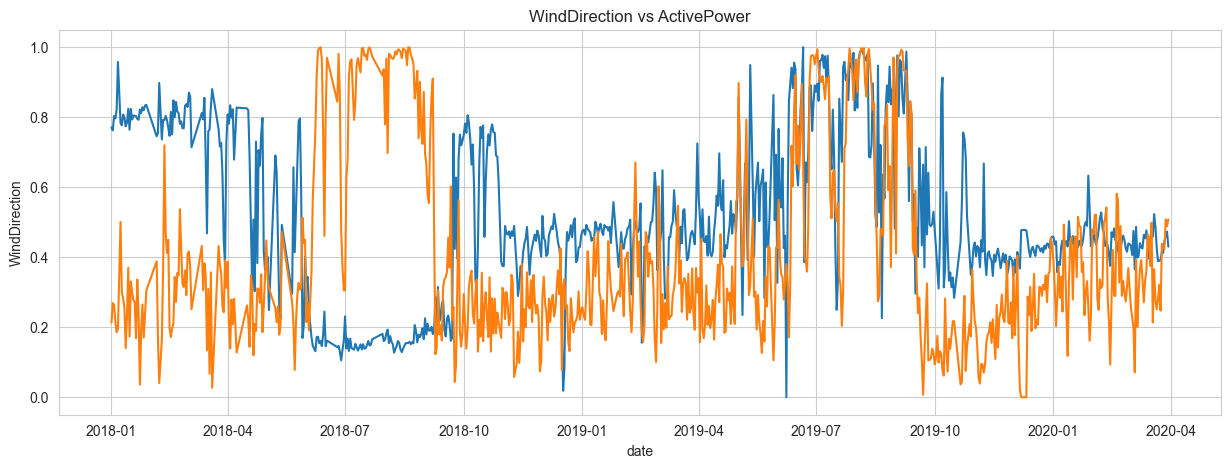

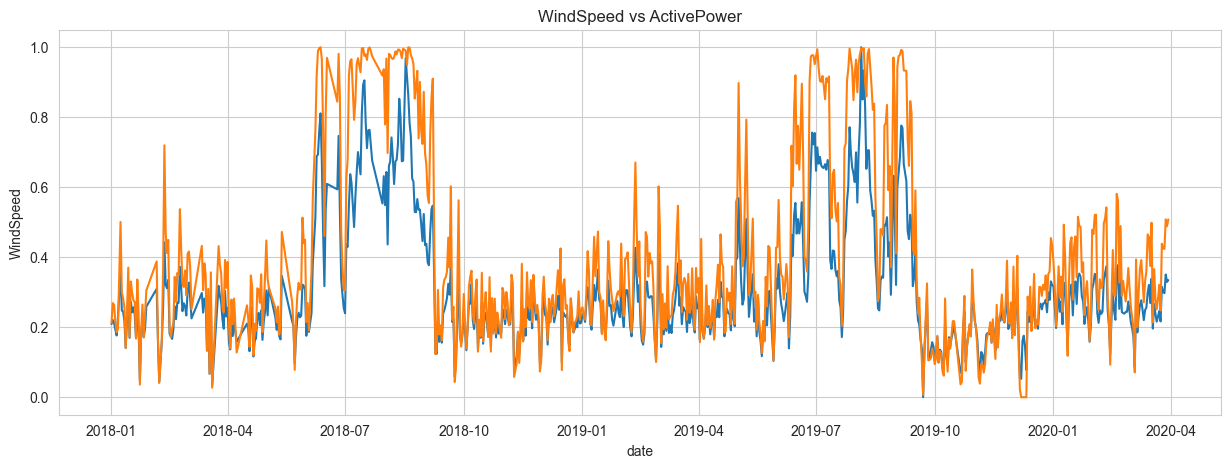

In [19]:
for i in features_required:
    fig,ax = plt.subplots(figsize=(15,5))
    sns.lineplot(ax=ax,x=df_9.index,y=df_9[i])
    sns.lineplot(ax=ax,x=df_9.index,y=df_9[target_required])
    ax.set(title=i+" vs "+target_required)

<Axes: >

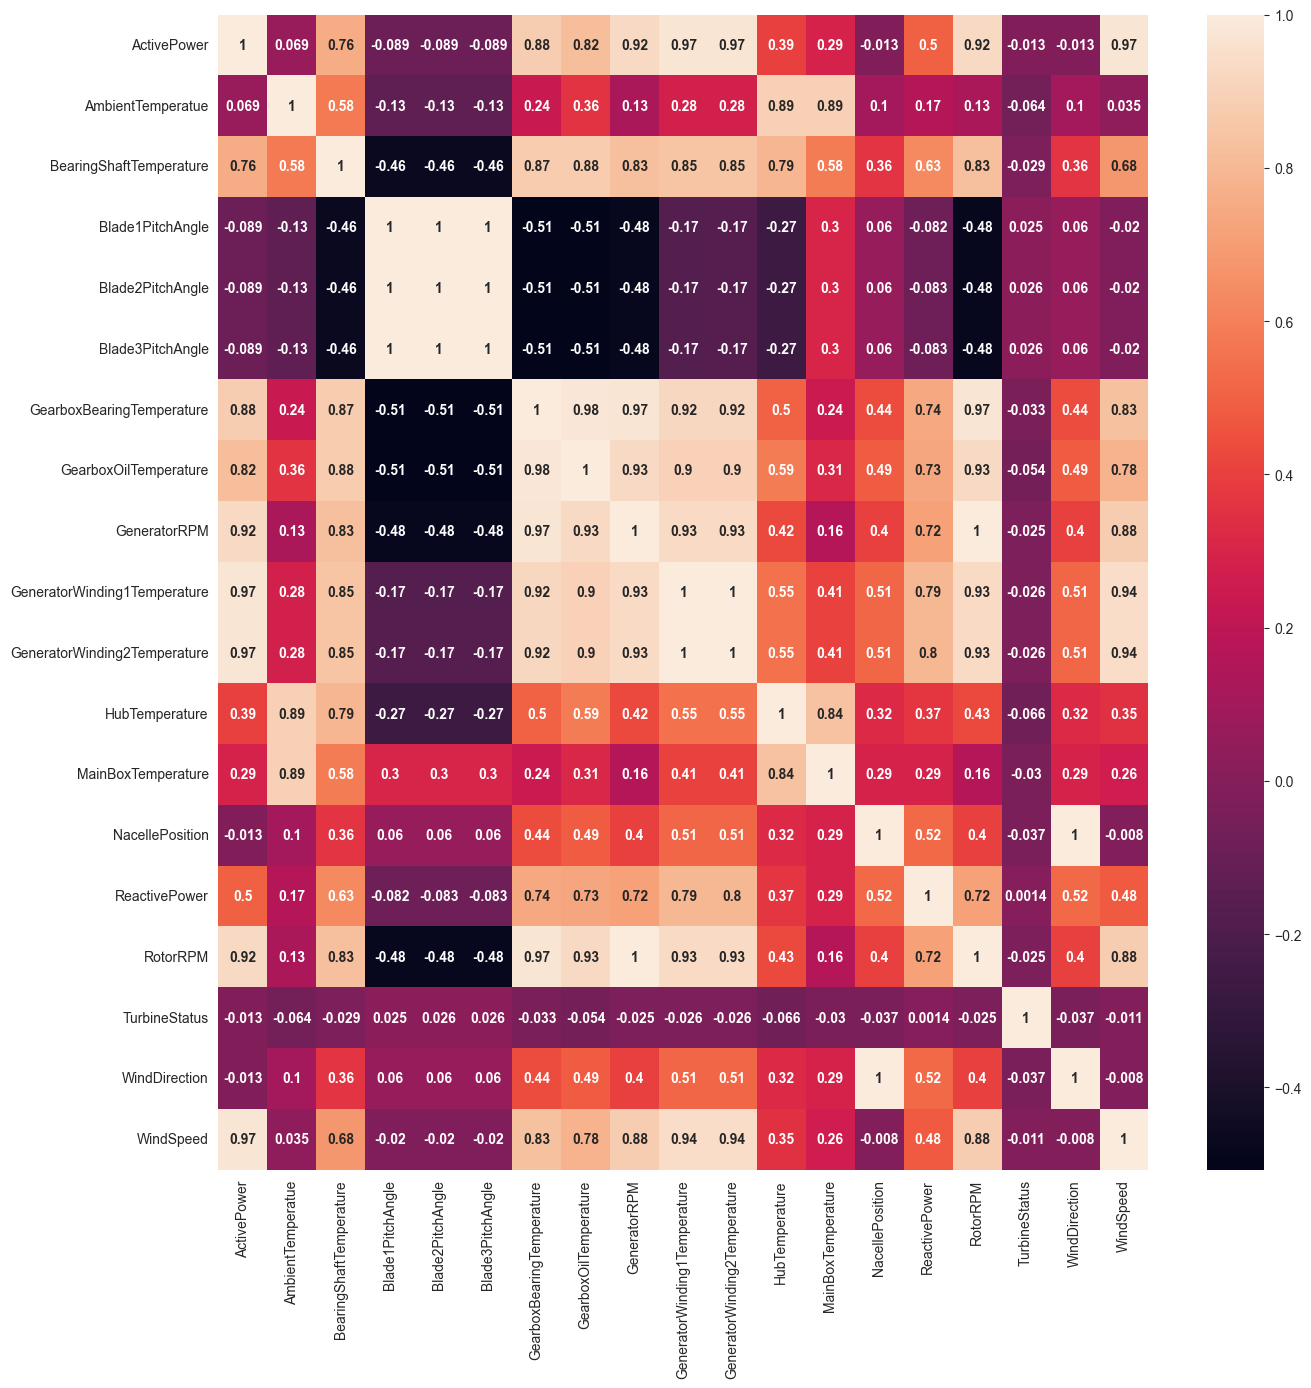

In [20]:
corr_matrix = df_9.corr()
fig,ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr_matrix,annot=True,ax=ax,annot_kws={"weight":"bold"})

In [21]:
corr_matrix["ActivePower"].round(2)

ActivePower                     1.00
AmbientTemperatue               0.07
BearingShaftTemperature         0.76
Blade1PitchAngle               -0.09
Blade2PitchAngle               -0.09
Blade3PitchAngle               -0.09
GearboxBearingTemperature       0.88
GearboxOilTemperature           0.82
GeneratorRPM                    0.92
GeneratorWinding1Temperature    0.97
GeneratorWinding2Temperature    0.97
HubTemperature                  0.39
MainBoxTemperature              0.29
NacellePosition                -0.01
ReactivePower                   0.50
RotorRPM                        0.92
TurbineStatus                  -0.01
WindDirection                  -0.01
WindSpeed                       0.97
Name: ActivePower, dtype: float64

In [22]:
corr_matrix_sorted = corr_matrix["ActivePower"].sort_values(ascending=False)
final_columns = corr_matrix_sorted.iloc[0:2].index.values.tolist()
final_columns

['ActivePower', 'WindSpeed']

In [23]:
df_final = df_4[final_columns]
df_final.dropna(inplace=True)

In [24]:
df_final.head()

ActivePower  WindSpeed
Unnamed: 0                                       
2018-01-01 06:20:00+00:00    26.212347   3.042750
2018-01-01 06:40:00+00:00    59.632658   3.424814
2018-01-01 06:50:00+00:00    40.889650   3.507172
2018-01-01 10:40:00+00:00    34.398111   3.442212
2018-01-01 12:00:00+00:00    29.797653   3.031363

In [25]:
train_length = round(len(df_final) * 0.75)
train_length

59011

In [26]:
X_train = df_final.iloc[:train_length,1]
X_test = df_final.iloc[train_length:,1]
y_train = df_final.iloc[:train_length,0]
y_test = df_final.iloc[train_length:,0]

In [27]:
xgb_regr_1 = XGBRegressor(n_estimators=200)

In [28]:
xgb_regr_1.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test,y_test)],early_stopping_rounds=2,verbose=True)

[0]	validation_0-rmse:435.70937	validation_1-rmse:386.54013
[1]	validation_0-rmse:310.65130	validation_1-rmse:280.57808
[2]	validation_0-rmse:225.25410	validation_1-rmse:208.61759
[3]	validation_0-rmse:168.22416	validation_1-rmse:160.85528
[4]	validation_0-rmse:131.51710	validation_1-rmse:130.19471
[5]	validation_0-rmse:109.09650	validation_1-rmse:111.30755
[6]	validation_0-rmse:96.21067	validation_1-rmse:100.10655
[7]	validation_0-rmse:89.21380	validation_1-rmse:93.63592
[8]	validation_0-rmse:85.57032	validation_1-rmse:89.93154
[9]	validation_0-rmse:83.71948	validation_1-rmse:87.80270
[10]	validation_0-rmse:82.79818	validation_1-rmse:86.56178
[11]	validation_0-rmse:82.34013	validation_1-rmse:85.81596
[12]	validation_0-rmse:82.11367	validation_1-rmse:85.35732
[13]	validation_0-rmse:81.99798	validation_1-rmse:85.06701
[14]	validation_0-rmse:81.94085	validation_1-rmse:84.88309
[15]	validation_0-rmse:81.91207	validation_1-rmse:84.76345
[16]	validation_0-rmse:81.89775	validation_1-rmse:84.

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [29]:
y_pred = xgb_regr_1.predict(X_test)

In [30]:
y_pred[0:10]

array([820.56757, 615.7462 , 626.96844, 699.86633, 720.34973, 566.1519 ,
       586.76447, 539.96564, 376.47495, 363.93622], dtype=float32)

In [31]:
target_df = pd.DataFrame(columns=["Actual","Predicted"],index=y_test.index)
target_df["Actual"] = y_test.copy()
target_df["Predicted"] = y_pred.copy()

In [32]:
target_df.head()

Actual   Predicted
Unnamed: 0                                       
2019-09-24 02:50:00+00:00  758.268904  820.567566
2019-09-24 03:00:00+00:00  603.322136  615.746216
2019-09-24 03:10:00+00:00  574.104500  626.968445
2019-09-24 03:20:00+00:00  623.087376  699.866333
2019-09-24 03:30:00+00:00  706.587516  720.349731

In [33]:
r2_score_xgboost = r2_score(target_df["Actual"],target_df["Predicted"])
mean_absolute_error_xgboost = mean_absolute_error(target_df["Actual"],target_df["Predicted"])
mean_squared_error_xgboost = mean_squared_error(target_df["Actual"],target_df["Predicted"])
mean_absolute_percentage_error_xgboost = mean_absolute_percentage_error(target_df["Actual"],target_df["Predicted"])

In [34]:
print("R2 score                        :  ",round(r2_score_xgboost,2))
print("Mean Absolute Error             :  ",round(mean_absolute_error_xgboost,2))
print("Mean Squared Error              :  ",round(mean_squared_error_xgboost,2))
print("Root Mean Squared Error         :  ",round(np.sqrt(mean_squared_error_xgboost),2))
print("Mean Absolute Percentage Error  :  ",round(mean_absolute_percentage_error_xgboost,2))

R2 score                        :   0.96
Mean Absolute Error             :   53.9
Mean Squared Error              :   7141.96
Root Mean Squared Error         :   84.51
Mean Absolute Percentage Error  :   2.5579880438552224e+16


In [35]:
target_df_mod = target_df.reset_index()
target_df_mod["Unnamed: 0"] = pd.to_datetime(target_df_mod["Unnamed: 0"])
target_df_mod["date"] = target_df_mod["Unnamed: 0"].dt.date
target_df_daily = target_df_mod.groupby(by="date").mean()[["Actual","Predicted"]]
target_df_daily.head()

Actual   Predicted
date                              
2019-09-24  269.019515  298.024231
2019-09-25  559.441794  588.308777
2019-09-26  181.207849  190.253754
2019-09-27  183.946132  199.513184
2019-09-28  191.433078  221.099686

[Text(0.5, 1.0, 'Actual vs Predicted')]

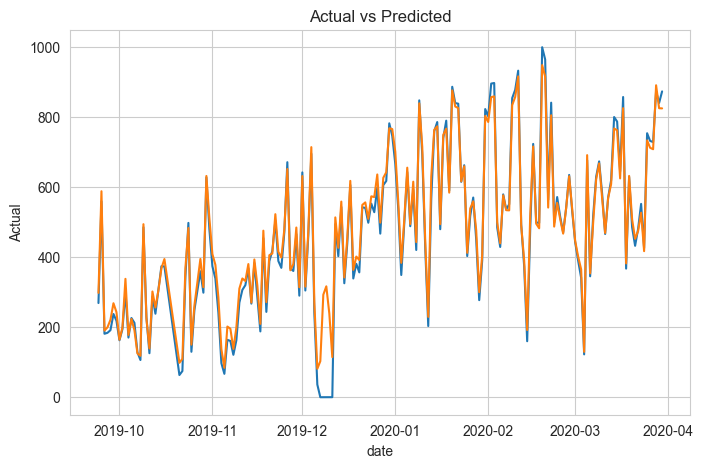

In [36]:
fig,ax = plt.subplots(figsize=(8,5))
sns.lineplot(x=target_df_daily.index,y=target_df_daily["Actual"])
sns.lineplot(x=target_df_daily.index,y=target_df_daily["Predicted"])
ax.set(title="Actual vs Predicted")

In [37]:
df_final_mod = df_final.reset_index()
df_final_mod["Unnamed: 0"] = pd.to_datetime(df_final_mod["Unnamed: 0"])
df_final_mod["date"] = df_final_mod["Unnamed: 0"].dt.date
df_final_daily = df_final_mod.groupby(by="date").mean()[["ActivePower","WindSpeed"]]

X_test_mod = X_test.reset_index()
X_test_mod["Unnamed: 0"] = pd.to_datetime(X_test_mod["Unnamed: 0"])
X_test_mod["date"] = X_test_mod["Unnamed: 0"].dt.date
X_test_mod_2 = X_test_mod.groupby(by="date").mean()["WindSpeed"]

target_df_daily_final = pd.DataFrame(columns=["ActivePower","WindSpeed"])
target_df_daily_final["ActivePower"] = target_df_daily["Predicted"].values
target_df_daily_final["WindSpeed"] = X_test_mod_2.values
target_df_daily_final.index = target_df_daily.index

target_df_daily_final.head()

ActivePower  WindSpeed
date                              
2019-09-24   298.024231   4.853342
2019-09-25   588.308777   5.968495
2019-09-26   190.253754   4.261015
2019-09-27   199.513184   4.253687
2019-09-28   221.099686   4.491100

[Text(0.5, 1.0, 'Actual vs Predicted')]

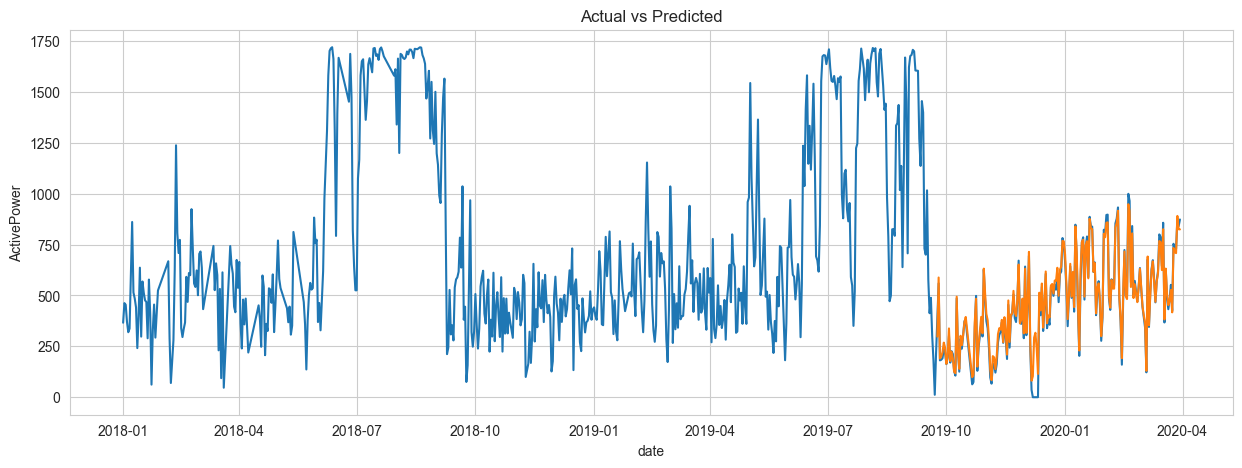

In [38]:
fig,ax = plt.subplots(figsize=(15,5))
sns.lineplot(x=df_final_daily.index,y=df_final_daily["ActivePower"])
sns.lineplot(x=target_df_daily_final.index,y=target_df_daily_final["ActivePower"])
ax.set(title="Actual vs Predicted")

### Prediction of Future Values

In [39]:
initial_date = datetime.fromisoformat("2020-04-01 12:00:00+00:00")
final_date = datetime.fromisoformat("2020-06-01 12:00:00+00:00")
interval = timedelta(minutes=10)
date_range = []
i = initial_date
future_dates = []

while i <= final_date:
    date_range.append(
        {"hour"           : i.hour,
         "minute"         : i.minute,
         "day"            : i.day,
         "month"          : i.month,
         "year"           : i.year,
         "dayofweek"      : 0 if i.weekday() == 6 else i.weekday() + 1,
         "dayofyear"      : i.timetuple().tm_yday,
         "calenderweek"   : i.isocalendar().week
         }
    )
    future_dates.append(i)
    i += interval

In [40]:
df_future_dates = pd.DataFrame(date_range)
df_future_dates.head()

hour  minute  day  month  year  dayofweek  dayofyear  calenderweek
0    12       0    1      4  2020          3         92            14
1    12      10    1      4  2020          3         92            14
2    12      20    1      4  2020          3         92            14
3    12      30    1      4  2020          3         92            14
4    12      40    1      4  2020          3         92            14

In [41]:
dict_past_values = []
past_dates = []
for k in df_final.index.values:
    i = datetime.fromisoformat(k)
    dict_past_values.append(
        {"hour"           : i.hour,
         "minute"         : i.minute,
         "day"            : i.day,
         "month"          : i.month,
         "year"           : i.year,
         "dayofweek"      : 0 if i.weekday() == 6 else i.weekday() + 1,
         "dayofyear"      : i.timetuple().tm_yday,
         "calenderweek"   : i.isocalendar().week
         }
    )
    past_dates.append(i)
df_past_dates = pd.DataFrame(dict_past_values)
df_past_dates["ActivePower"] = df_final["ActivePower"].values

In [42]:
train_length_1 = round(len(df_past_dates) * 0.75)
train_length_1

59011

In [43]:
X_train_1 = df_past_dates.loc[:train_length_1,:].drop(columns=["ActivePower"])
X_test_1 = df_past_dates.loc[train_length_1:,:].drop(columns=["ActivePower"]).reset_index(drop=True)
y_train_1 = df_past_dates.loc[:train_length_1,"ActivePower"]
y_test_1 = df_past_dates.loc[train_length_1:,"ActivePower"].reset_index(drop=True)

In [44]:
xgb_regr_2 = XGBRegressor(n_estimators=1000,learning_rate=0.01)

In [45]:
xgb_regr_2.fit(X_train_1,y_train_1,eval_set=[(X_train_1,y_train_1),(X_test_1,y_test_1)],early_stopping_rounds=2,verbose=True)

[0]	validation_0-rmse:612.94243	validation_1-rmse:537.92872
[1]	validation_0-rmse:609.39830	validation_1-rmse:535.46122
[2]	validation_0-rmse:605.90346	validation_1-rmse:533.03195
[3]	validation_0-rmse:602.48302	validation_1-rmse:530.64693
[4]	validation_0-rmse:599.08585	validation_1-rmse:528.28917
[5]	validation_0-rmse:595.77764	validation_1-rmse:525.97890
[6]	validation_0-rmse:592.50142	validation_1-rmse:523.70273
[7]	validation_0-rmse:589.26058	validation_1-rmse:521.46082
[8]	validation_0-rmse:586.07357	validation_1-rmse:519.25113
[9]	validation_0-rmse:582.95041	validation_1-rmse:517.09624
[10]	validation_0-rmse:579.82538	validation_1-rmse:514.96472
[11]	validation_0-rmse:576.79286	validation_1-rmse:512.86736
[12]	validation_0-rmse:573.78298	validation_1-rmse:510.81473
[13]	validation_0-rmse:570.81112	validation_1-rmse:508.78331
[14]	validation_0-rmse:567.90388	validation_1-rmse:506.78782
[15]	validation_0-rmse:565.02811	validation_1-rmse:504.82865
[16]	validation_0-rmse:562.17363	v

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [46]:
y_pred_1 = xgb_regr_2.predict(X_test_1)
y_pred_2 = xgb_regr_2.predict(df_future_dates)

In [47]:
target_df_1 = pd.DataFrame(columns=["Actual","Predicted"])
target_df_1["Actual"] = y_test_1.copy()
target_df_1["Predicted"] = y_pred_1.copy()

In [48]:
target_df_1.head()

Actual   Predicted
0  758.268904  685.676697
1  603.322136  667.997192
2  574.104500  667.997192
3  623.087376  667.997192
4  706.587516  667.997192

In [49]:
r2_score_xgboost_1 = r2_score(target_df_1["Actual"], target_df_1["Predicted"])
mean_absolute_error_xgboost_1 = mean_absolute_error(target_df_1["Actual"], target_df_1["Predicted"])
mean_squared_error_xgboost_1 = mean_squared_error(target_df_1["Actual"], target_df_1["Predicted"])
mean_absolute_percentage_error_xgboost_1 = mean_absolute_percentage_error(target_df_1["Actual"], target_df_1["Predicted"])

In [50]:
print("R2 score                        :  ", round(r2_score_xgboost_1,2))
print("Mean Absolute Error             :  ", round(mean_absolute_error_xgboost_1,2))
print("Mean Squared Error              :  ", round(mean_squared_error_xgboost_1,2))
print("Root Mean Squared Error         :  ", round(np.sqrt(mean_squared_error_xgboost_1),2))
print("Mean Absolute Percentage Error  :  ", round(mean_absolute_percentage_error_xgboost_1,2))

R2 score                        :   0.11
Mean Absolute Error             :   357.0
Mean Squared Error              :   175405.41
Root Mean Squared Error         :   418.81
Mean Absolute Percentage Error  :   6.929605698626844e+16


In [51]:
print("With Wind Speed")
print()
print("R2 score                        :  ",round(r2_score_xgboost,2))
print("Mean Absolute Error             :  ",round(mean_absolute_error_xgboost,2))
print("Mean Squared Error              :  ",round(mean_squared_error_xgboost,2))
print("Root Mean Squared Error         :  ",round(np.sqrt(mean_squared_error_xgboost),2))
print("Mean Absolute Percentage Error  :  ",round(mean_absolute_percentage_error_xgboost,2))
print()
print()
print("Without Wind Speed")
print()
print("R2 score                        :  ", round(r2_score_xgboost_1,2))
print("Mean Absolute Error             :  ", round(mean_absolute_error_xgboost_1,2))
print("Mean Squared Error              :  ", round(mean_squared_error_xgboost_1,2))
print("Root Mean Squared Error         :  ", round(np.sqrt(mean_squared_error_xgboost_1),2))
print("Mean Absolute Percentage Error  :  ", round(mean_absolute_percentage_error_xgboost_1,2))

With Wind Speed

R2 score                        :   0.96
Mean Absolute Error             :   53.9
Mean Squared Error              :   7141.96
Root Mean Squared Error         :   84.51
Mean Absolute Percentage Error  :   2.5579880438552224e+16


Without Wind Speed

R2 score                        :   0.11
Mean Absolute Error             :   357.0
Mean Squared Error              :   175405.41
Root Mean Squared Error         :   418.81
Mean Absolute Percentage Error  :   6.929605698626844e+16


In [52]:
target_df_2 = df_future_dates.copy()
target_df_2["ActivePower"] = y_pred_2.copy()

In [53]:
target_df_2.head()

hour  minute  day  month  year  dayofweek  dayofyear  calenderweek  \
0    12       0    1      4  2020          3         92            14   
1    12      10    1      4  2020          3         92            14   
2    12      20    1      4  2020          3         92            14   
3    12      30    1      4  2020          3         92            14   
4    12      40    1      4  2020          3         92            14   

   ActivePower  
0   584.844238  
1   584.844238  
2   584.844238  
3   584.844238  
4   584.844238

df_1 -> Past values upto 75%
df_2 -> Past values last 25% - Actual and Predicted Values
df_3 -> Future Values

In [53]:
X_train_1.head()

hour  minute  day  month  year  dayofweek  dayofyear  calenderweek
0     6      20    1      1  2018          1          1             1
1     6      40    1      1  2018          1          1             1
2     6      50    1      1  2018          1          1             1
3    10      40    1      1  2018          1          1             1
4    12       0    1      1  2018          1          1             1

In [54]:
ddf_1 = X_train_1.copy()
ddf_1["Actual"] = y_train_1.copy()
ddf_1["Unnamed: 0"] = pd.to_datetime(past_dates[0:train_length+1])
ddf_1 = ddf_1[["Unnamed: 0","Actual"]]
ddf_1["date"] = ddf_1["Unnamed: 0"].dt.date
ddf_1.drop(columns=["Unnamed: 0"],inplace=True)
ddf_1 = ddf_1.groupby(by="date").mean()
ddf_1.head()

Actual
date                  
2018-01-01  366.223561
2018-01-02  462.550740
2018-01-03  454.417752
2018-01-04  369.952190
2018-01-05  319.446595

In [55]:
ddf_2 = X_test_1.copy()
ddf_2["Actual"] = y_test_1.copy()
ddf_2["Predicted"] = y_pred_1.copy()
ddf_2["Unnamed: 0"] = pd.to_datetime(past_dates[train_length:])
ddf_2 = ddf_2[["Unnamed: 0","Actual","Predicted"]]
ddf_2["date"] = ddf_2["Unnamed: 0"].dt.date
ddf_2.drop(columns=["Unnamed: 0"],inplace=True)
ddf_2 = ddf_2.groupby(by="date").mean()
ddf_2.head()

Actual   Predicted
date                              
2019-09-24  269.019515  550.514099
2019-09-25  559.441794  532.273010
2019-09-26  181.207849  555.547241
2019-09-27  183.946132  538.071960
2019-09-28  191.433078  551.984741

In [56]:
ddf_3 = target_df_2.copy()
ddf_3["Predicted"] = y_pred_2.copy()
ddf_3["Unnamed: 0"] = pd.to_datetime(future_dates)
ddf_3 = ddf_3[["Unnamed: 0","Predicted"]]
ddf_3["date"] = ddf_3["Unnamed: 0"].dt.date
ddf_3.drop(columns=["Unnamed: 0"],inplace=True)
ddf_3 = ddf_3.groupby(by="date").mean()
ddf_3.head()

Predicted
date                  
2020-04-01  695.739624
2020-04-02  592.073059
2020-04-03  592.073059
2020-04-04  592.073059
2020-04-05  594.492859

In [57]:
ddf_4 = df_past_dates.copy()
ddf_4 = ddf_4.rename(columns={"ActivePower":"Actual"})
ddf_4["Unnamed: 0"] = pd.to_datetime(past_dates)
ddf_4 = ddf_4[["Unnamed: 0","Actual"]]
ddf_4["date"] = ddf_4["Unnamed: 0"].dt.date
ddf_4.drop(columns=["Unnamed: 0"],inplace=True)
ddf_4 = ddf_4.groupby(by="date").mean()
ddf_4.head()

Actual
date                  
2018-01-01  366.223561
2018-01-02  462.550740
2018-01-03  454.417752
2018-01-04  369.952190
2018-01-05  319.446595

[Text(0.5, 1.0, 'Actual vs Predicted')]

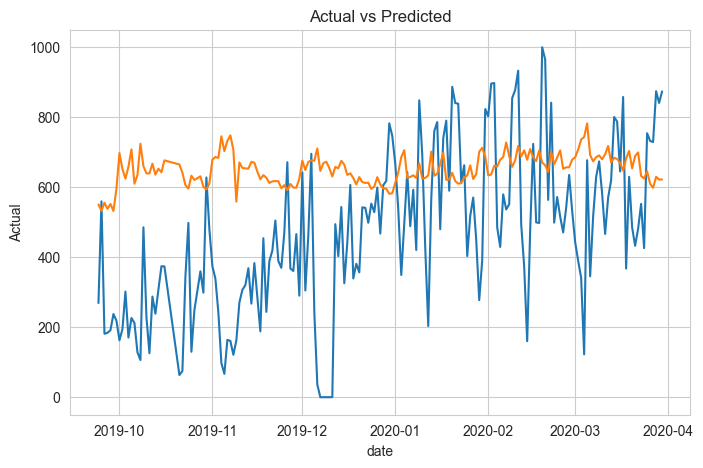

In [58]:
fig,ax = plt.subplots(figsize=(8,5))
sns.lineplot(x=ddf_2.index,y=ddf_2["Actual"])
sns.lineplot(x=ddf_2.index,y=ddf_2["Predicted"])
ax.set(title="Actual vs Predicted")

[Text(0.5, 1.0, 'Actual vs Predicted')]

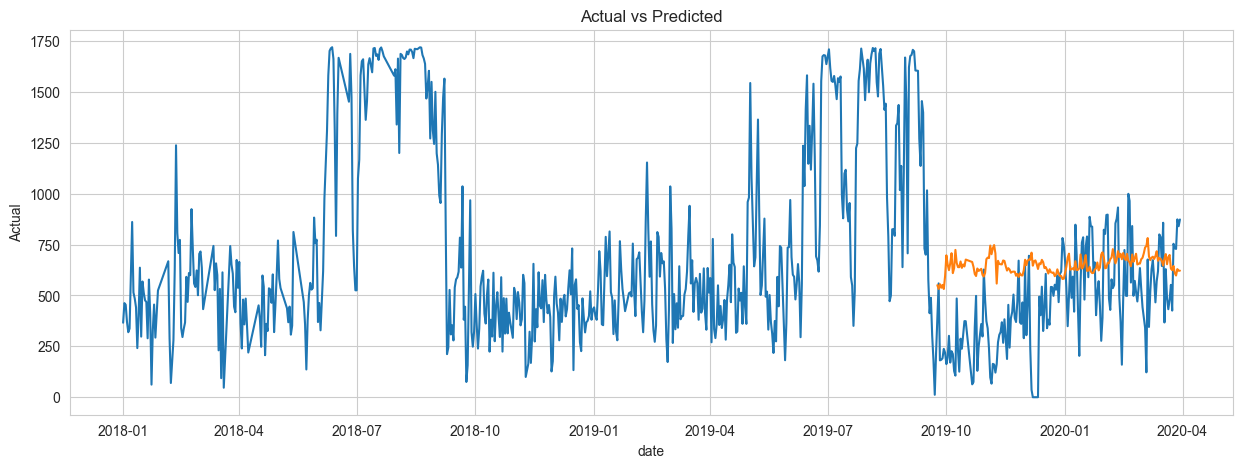

In [59]:
fig,ax = plt.subplots(figsize=(15,5))
sns.lineplot(x=ddf_4.index,y=ddf_4["Actual"])
sns.lineplot(x=ddf_2.index,y=ddf_2["Predicted"])
ax.set(title="Actual vs Predicted")

[Text(0.5, 1.0, 'Past and Future Active Power')]

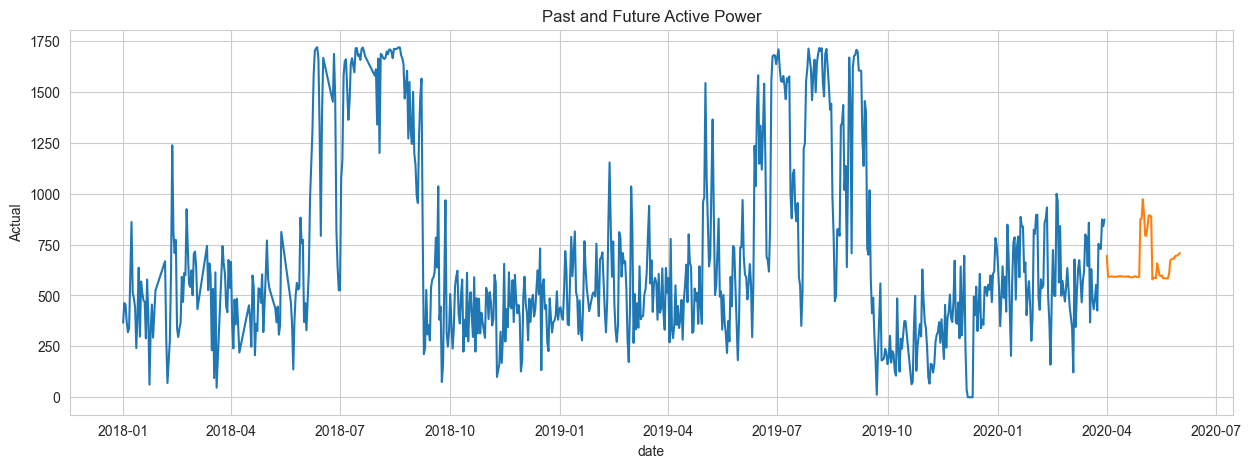

In [60]:
fig,ax = plt.subplots(figsize=(15,5))
sns.lineplot(x=ddf_4.index,y=ddf_4["Actual"])
sns.lineplot(x=ddf_3.index,y=ddf_3["Predicted"])
ax.set(title="Past and Future Active Power")

[Text(0.5, 1.0, 'Past Actual vs Predicted Active Powers, and Future Active Power')]

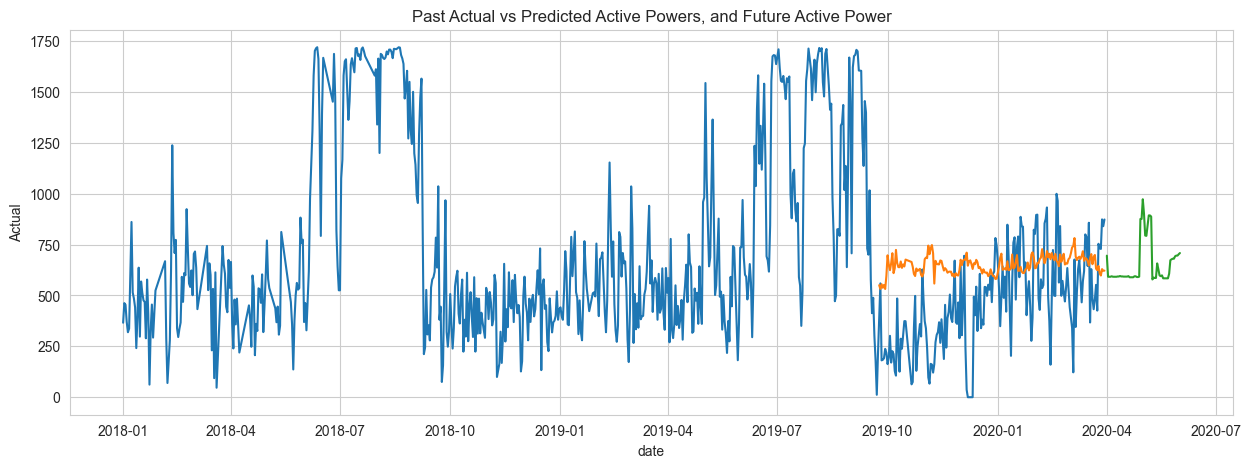

In [61]:
fig,ax = plt.subplots(figsize=(15,5))
sns.lineplot(x=ddf_4.index,y=ddf_4["Actual"])
sns.lineplot(x=ddf_2.index,y=ddf_2["Predicted"])
sns.lineplot(x=ddf_3.index,y=ddf_3["Predicted"])
ax.set(title="Past Actual vs Predicted Active Powers, and Future Active Power")

In [62]:
xgb_regr_1.save_model("xgb_model_1.json")
xgb_regr_2.save_model("xgb_model_2.json")

In [63]:
#file_1 = open("xgb_model_1.joblib","wb")
file_2 = open("xgb_model_2.joblib","wb")
file_3 = open("app/xgb_model_2.joblib","wb")

In [64]:
joblib.dump(value=xgb_regr_2,filename=file_2)
joblib.dump(value=xgb_regr_2,filename=file_3)